In [6]:
import sys
sys.path.append("..")

In [9]:
import numpy as np
import logging
import pickle
import glob

from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import RobustScaler
from sklearn.utils import check_random_state

from recnn.preprocessing import permute_by_pt
from recnn.preprocessing import rotate

%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8,8)

# Z 

In [3]:
filename_train = "../data/z/kt-train.pickle"
filename_test = "../data/z/kt-test.pickle"

rng = check_random_state(1)

# Make training data
print("Loading training data...")

fd = open(filename_train, "rb")
X, y = pickle.load(fd)
fd.close()
y = np.array(y)

print("\tfilename = %s" % filename_train)
print("\tX size = %d" % len(X))
print("\ty size = %d" % len(y))

# Preprocessing 
print("Preprocessing...")
X = [rotate(permute_by_pt(jet)) for jet in X]
tf = RobustScaler().fit(np.vstack([jet["content"] for jet in X]))

for jet in X:
    jet["content"] = tf.transform(jet["content"])

# Make test data 
print("Loading test data...")

fd = open(filename_test, "rb")
X, y = pickle.load(fd)
fd.close()
y = np.array(y)

print("\tfilename = %s" % filename_test)
print("\tX size = %d" % len(X))
print("\ty size = %d" % len(y))

# Preprocessing 
print("Preprocessing...")
X = [rotate(permute_by_pt(jet)) for jet in X]

for jet in X:
    jet["content"] = tf.transform(jet["content"])

Loading training data...
	filename = ../data/z/kt-train.pickle
	X size = 58946
	y size = 58946
Preprocessing...
Loading test data...
	filename = ../data/z/kt-test.pickle
	X size = 20000
	y size = 20000
Preprocessing...


## `n_hidden`

roc_auc(z-gated-n_hidden=10.pickle) = 0.77751112


/home/gilles/anaconda3/envs/rec-nn/lib/python3.5/site-packages/ipykernel/__main__.py:18: RuntimeWarning: divide by zero encountered in true_divide


roc_auc(z-gated-n_hidden=20.pickle) = 0.788137635
roc_auc(z-gated-n_hidden=30.pickle) = 0.78512988
roc_auc(z-gated-n_hidden=40.pickle) = 0.78675996
roc_auc(z-gated-n_hidden=50.pickle) = 0.787343725


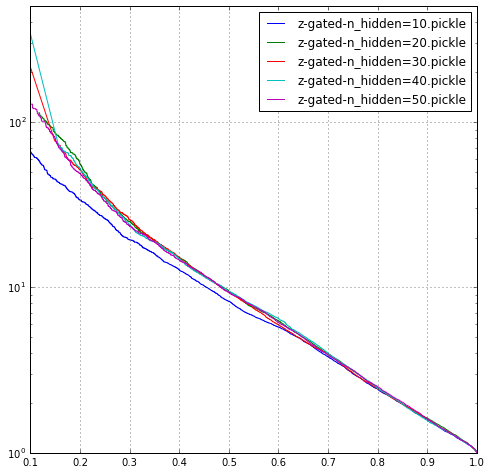

roc_auc(z-simple-n_hidden=10.pickle) = 0.780206545


/home/gilles/anaconda3/envs/rec-nn/lib/python3.5/site-packages/ipykernel/__main__.py:41: RuntimeWarning: divide by zero encountered in true_divide


roc_auc(z-simple-n_hidden=20.pickle) = 0.78208833
roc_auc(z-simple-n_hidden=30.pickle) = 0.785585215
roc_auc(z-simple-n_hidden=40.pickle) = 0.787423575
roc_auc(z-simple-n_hidden=50.pickle) = 0.78149203


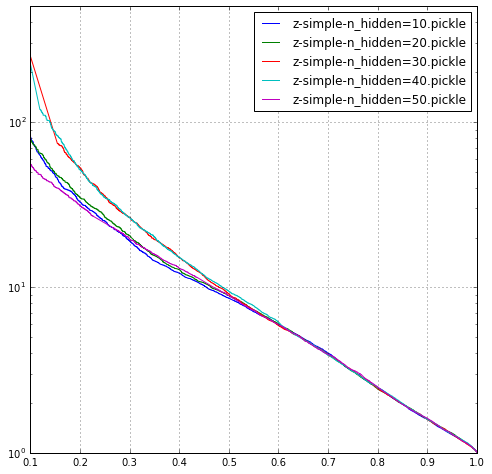

In [10]:
from recnn.recnn import grnn_predict_simple
from recnn.recnn import grnn_predict_gated
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

for f in sorted(glob.glob("../models/n_hidden/z*gated*")):
    filename = f.split("/")[-1]
    fd = open(f, "rb")
    params = pickle.load(fd)
    fd.close()
    
    predict = grnn_predict_gated    
    y_pred = predict(params, X)

    fpr, tpr, _ = roc_curve(y, y_pred)
    print("roc_auc(%s) =" % filename, roc_auc_score(y, y_pred))
    #plt.plot(fpr, tpr, label=filename)
    plt.plot(tpr, 1. / fpr, label=filename)

plt.xlim(0.1, 1.0)
plt.ylim(1, 500)
plt.yscale("log")
plt.grid()
plt.legend(loc="best")
plt.legend(loc="best")
plt.show()


for f in sorted(glob.glob("../models/n_hidden/z*simple*")):
    filename = f.split("/")[-1]
    fd = open(f, "rb")
    params = pickle.load(fd)
    fd.close()

    predict = grnn_predict_simple        
    y_pred = predict(params, X)

    fpr, tpr, _ = roc_curve(y, y_pred)
    print("roc_auc(%s) =" % filename, roc_auc_score(y, y_pred))
    #plt.plot(fpr, tpr, label=filename)
    plt.plot(tpr, 1. / fpr, label=filename)

plt.xlim(0.1, 1.0)
plt.ylim(1, 500)
plt.yscale("log")
plt.grid()
plt.legend(loc="best")
plt.show()

## `step_size` / `decay`

roc_auc(z-simple-0.001-0.5.pickle) = 0.778740325


/home/gilles/anaconda3/envs/rec-nn/lib/python3.5/site-packages/ipykernel/__main__.py:19: RuntimeWarning: divide by zero encountered in true_divide


roc_auc(z-simple-0.001-0.75.pickle) = 0.789157785
roc_auc(z-simple-0.001-0.9.pickle) = 0.78848536
roc_auc(z-simple-0.001-1.0.pickle) = 0.79062911
roc_auc(z-simple-0.005-0.5.pickle) = 0.79213718
roc_auc(z-simple-0.005-0.75.pickle) = 0.78955344
roc_auc(z-simple-0.005-0.9.pickle) = 0.78944718
roc_auc(z-simple-0.005-1.0.pickle) = 0.78697345
roc_auc(z-simple-0.01-0.5.pickle) = 0.780372425
roc_auc(z-simple-0.01-0.75.pickle) = 0.78266208
roc_auc(z-simple-0.01-0.9.pickle) = 0.77408963
roc_auc(z-simple-0.01-1.0.pickle) = 0.76557247


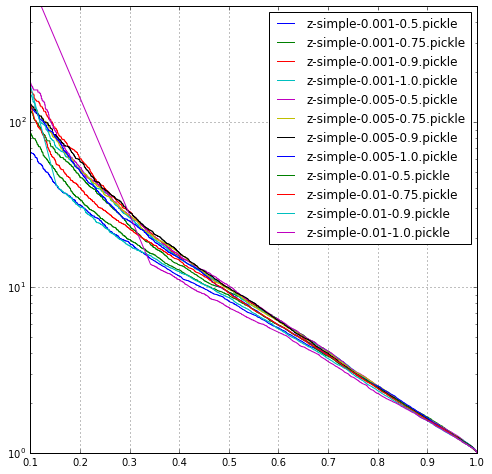

In [11]:
from recnn.recnn import grnn_predict_simple
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import glob

for f in sorted(glob.glob("../models/step_size+decay/z*")):
    filename = f.split("/")[-1]
    
    fd = open(f, "rb")
    params = pickle.load(fd)
    fd.close()

    predict = grnn_predict_simple
    y_pred = predict(params, X)

    fpr, tpr, _ = roc_curve(y, y_pred)
    print("roc_auc(%s) =" % filename, roc_auc_score(y, y_pred))
    #plt.plot(fpr, tpr, label="%s" % filename)
    plt.plot(tpr, 1. / fpr, label=filename)

plt.xlim(0.1, 1.0)
plt.ylim(1, 500)
plt.yscale("log")
plt.grid()
plt.legend(loc="best")
plt.show()

Best so far:

```
- ../models/step_size+decay/z-simple-0.005-0.5.pickle
- simple
- n_hidden=40
- step_size=0.005
- decay=0.5 
- batch_size=64
- AUC = 0.79213718
```

---

# W

In [12]:
filename_train = "../data/w-vs-qcd/kt-train.pickle"
filename_test = "../data/w-vs-qcd/kt-test.pickle"

rng = check_random_state(1)

# Make training data
print("Loading training data...")

fd = open(filename_train, "rb")
X, y = pickle.load(fd)
fd.close()
y = np.array(y)

print("\tfilename = %s" % filename_train)
print("\tX size = %d" % len(X))
print("\ty size = %d" % len(y))

# Preprocessing 
print("Preprocessing...")
X = [rotate(permute_by_pt(jet)) for jet in X]
tf = RobustScaler().fit(np.vstack([jet["content"] for jet in X]))

for jet in X:
    jet["content"] = tf.transform(jet["content"])

# Make test data 
print("Loading test data...")

fd = open(filename_test, "rb")
X, y = pickle.load(fd)
fd.close()
y = np.array(y)

print("\tfilename = %s" % filename_test)
print("\tX size = %d" % len(X))
print("\ty size = %d" % len(y))

# Preprocessing 
print("Preprocessing...")
X = [rotate(permute_by_pt(jet)) for jet in X]

for jet in X:
    jet["content"] = tf.transform(jet["content"])

# Cropping
print("Cropping...")

# X_ = X
# y_ = y

X_ = [j for j in X if 250 < j["pt"] < 300 and 50 < j["mass"] < 110]
y_ = [y[i] for i, j in enumerate(X) if 250 < j["pt"] < 300 and 50 < j["mass"] < 110]

X = X_
y = y_

Loading training data...
	filename = ../data/w-vs-qcd/kt-train.pickle
	X size = 80000
	y size = 80000
Preprocessing...
Loading test data...
	filename = ../data/w-vs-qcd/kt-test.pickle
	X size = 20000
	y size = 20000
Preprocessing...
Cropping...


## `n_hidden`

roc_auc(w-gated-n_hidden=10.pickle) = 0.906409909511


/home/gilles/anaconda3/envs/rec-nn/lib/python3.5/site-packages/ipykernel/__main__.py:19: RuntimeWarning: divide by zero encountered in true_divide


roc_auc(w-gated-n_hidden=20.pickle) = 0.898933657096
roc_auc(w-gated-n_hidden=30.pickle) = 0.902537759796
roc_auc(w-gated-n_hidden=40.pickle) = 0.90885172023


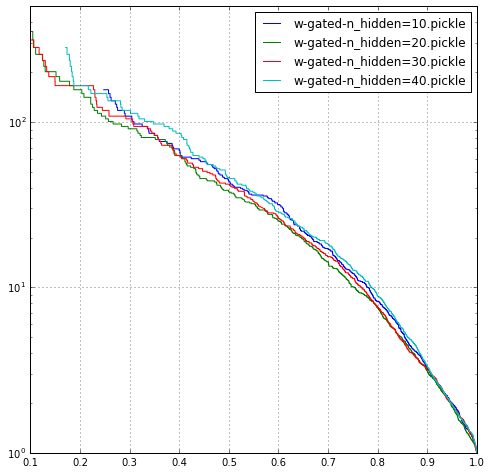

roc_auc(w-simple-n_hidden=10.pickle) = 0.908205301475


/home/gilles/anaconda3/envs/rec-nn/lib/python3.5/site-packages/ipykernel/__main__.py:43: RuntimeWarning: divide by zero encountered in true_divide


roc_auc(w-simple-n_hidden=20.pickle) = 0.911056974469
roc_auc(w-simple-n_hidden=30.pickle) = 0.913779126455
roc_auc(w-simple-n_hidden=40.pickle) = 0.914878814817
roc_auc(w-simple-n_hidden=50.pickle) = 0.913057863753


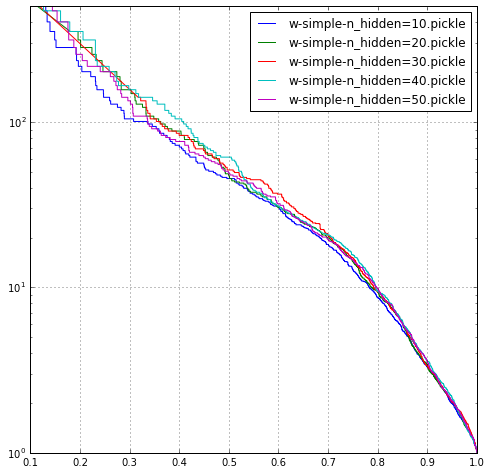

In [13]:
from recnn.recnn import grnn_predict_simple
from recnn.recnn import grnn_predict_gated
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

for f in sorted(glob.glob("../models/n_hidden/w*gated*")):
    filename = f.split("/")[-1]
    fd = open(f, "rb")
    params = pickle.load(fd)
    fd.close()
    
    predict = grnn_predict_gated    
    y_pred = predict(params, X)

    fpr, tpr, _ = roc_curve(y, y_pred)
    print("roc_auc(%s) =" % filename, roc_auc_score(y, y_pred))
    
    #plt.plot(fpr, tpr, label=filename)
    plt.plot(tpr, 1. / fpr, label=filename)

plt.xlim(0.1, 1.0)
plt.ylim(1, 500)
plt.yscale("log")
plt.grid()
plt.legend(loc="best")
plt.legend(loc="best")
plt.show()


for f in sorted(glob.glob("../models/n_hidden/w*simple*")):
    filename = f.split("/")[-1]
    fd = open(f, "rb")
    params = pickle.load(fd)
    fd.close()

    predict = grnn_predict_simple        
    y_pred = predict(params, X)

    fpr, tpr, _ = roc_curve(y, y_pred)
    print("roc_auc(%s) =" % filename, roc_auc_score(y, y_pred))
    
    #plt.plot(fpr, tpr, label=filename)
    plt.plot(tpr, 1. / fpr, label=filename)

plt.xlim(0.1, 1.0)
plt.ylim(1, 500)
plt.yscale("log")
plt.grid()
plt.legend(loc="best")
plt.show()

## `step_size` / `decay`

roc_auc(w-simple-0.001-0.5.pickle) = 0.913147590214


/home/gilles/anaconda3/envs/rec-nn/lib/python3.5/site-packages/ipykernel/__main__.py:19: RuntimeWarning: divide by zero encountered in true_divide


roc_auc(w-simple-0.001-0.75.pickle) = 0.917735610415
roc_auc(w-simple-0.001-0.9.pickle) = 0.918611953225
roc_auc(w-simple-0.001-1.0.pickle) = 0.916175966099
roc_auc(w-simple-0.005-0.5.pickle) = 0.912653986837
roc_auc(w-simple-0.005-0.75.pickle) = 0.915898806239
roc_auc(w-simple-0.005-0.9.pickle) = 0.913465191687
roc_auc(w-simple-0.005-1.0.pickle) = 0.906785908675
roc_auc(w-simple-0.01-0.5.pickle) = 0.911460689619
roc_auc(w-simple-0.01-0.75.pickle) = 0.913113565336
roc_auc(w-simple-0.01-0.9.pickle) = 0.908104898428
roc_auc(w-simple-0.01-1.0.pickle) = 0.898766983725


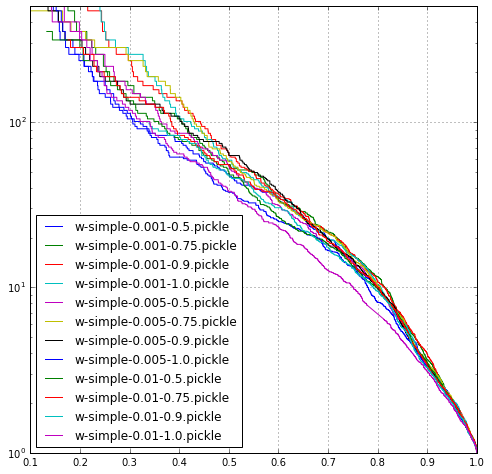

In [14]:
from recnn.recnn import grnn_predict_simple
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import glob

for f in sorted(glob.glob("../models/step_size+decay/w*")):
    filename = f.split("/")[-1]
    
    fd = open(f, "rb")
    params = pickle.load(fd)
    fd.close()

    predict = grnn_predict_simple
    y_pred = predict(params, X)

    fpr, tpr, _ = roc_curve(y, y_pred)
    print("roc_auc(%s) =" % filename, roc_auc_score(y, y_pred))
    #plt.plot(fpr, tpr, label="%s" % filename)
    plt.plot(tpr, 1. / fpr, label=filename)

plt.xlim(0.1, 1.0)
plt.ylim(1, 500)
plt.yscale("log")
plt.grid()
plt.legend(loc="best")
plt.show()

Best so far:
```
- w-simple-0.001-0.9.pickle
- simple
- n_hidden=40
- step_size=0.001
- decay=0.9
- batch_size=64
- AUC = 0.918611953225
```